# PCA Figure

A recapitulation of Jess' primer figure but written in python by Rob

In [2]:
df = pd.read_csv("../MGI/Taxonomy/MGI_reads_species.rawcounts.tsv.gz", sep='\t', compression='gzip')
df = df[df['taxonomy'].str.contains('k__Bacteria')]
df = df[~df['taxonomy'].str.endswith('s__')]
df = df[~df['taxonomy'].str.contains('g__;')]
df = df.set_index('taxonomy')
df.index = df.index.str.split(';').str[-1].str.replace('s__', '')
df = df.T
df.head()

taxonomy,Candidatus Aegiribacteria sp. MLS_C,Candidatus Kapaibacterium sp.,Candidatus Kapaibacterium thiocyanatum,Candidatus Stahlbacteria bacterium,bacterium (Candidatus Stahlbacteria) CG23_combo_of_CG06-09_8_20_14_all_34_7,bacterium (Candidatus Stahlbacteria) CG23_combo_of_CG06-09_8_20_14_all_40_9,Vermiphilus pyriformis,Candidatus Babela massiliensis,Candidatus Chromulinivorax destructor,Candidatus Ozemobacter sibiricus,...,Roseibacillus sp.,Roseimicrobium gellanilyticum,Sulfuriroseicoccus oceanibius,Verrucomicrobium sp. 3C,Verrucomicrobium sp. GAS474,Verrucomicrobium spinosum,Candidatus Eremiobacter sp. RRmetagenome_bin22,Candidatus Methylomirabilis lanthanidiphila,Candidatus Methylomirabilis limnetica,Candidatus Methylomirabilis oxygeniifera
768745_20190228_BAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698917_20180329_S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788707_20171213_S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698917_20171207_S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896213_20180427_S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [3]:
corrections = {
    '1085876_20180227_S': '1723809_20180227_S',
    '1447437_20171212_S': '1112926_20171212_S',
    '1588281_20180508_S': '1598281_20180508_S',
    '1590009_20171212_S': '1255498_20171212_S',
    '1651490_20171215_S': '1316979_20171215_S',
    '715927_20180226_S': '652927_20180226_S',
    '778851_20170918_S': '777851_20170918_S'
}

In [4]:
# Load metadata table
# This is generic so we can copy/paste. Yes, it should be a function, but its not.

# sequence_type = 'minion_ID'
sequence_type = 'MGI_ID'

# metadata = pd.read_csv("../Metadata/Metadata20241026.txt", encoding='utf-8', sep="\t", index_col=0)
metadata = pd.read_csv("../Metadata/Metadata20241026.txt", encoding='windows-1252', sep="\t", index_col=0)
metadata = metadata[~metadata[sequence_type].isna()]
todrop = []
for s in metadata[sequence_type]:
    if s not in df.index:
        print(f"ERROR: {s} not found in data frame, dropped from metadata", file=sys.stderr)
        todrop.append(s)

metadata.drop(todrop, inplace=True)

todrop = []
for s in df.index:
    if not metadata[sequence_type].str.contains(s).any():
        print(f"ERROR: {s} not found in metadata, dropped from dataframe", file=sys.stderr)
        todrop.append(s)
df.drop(todrop, inplace=True)
        
if metadata.shape[0] != df.shape[0]:
    print(f"ERROR: we have {metadata.shape[0]} rows in metadata and {df.shape[0]} data rows", file=sys.stderr)
metadata.head()

ERROR: 1723809_20180227_S not found in metadata, dropped from dataframe
ERROR: 1316979_20171215_S not found in metadata, dropped from dataframe
ERROR: 1255498_20171212_S not found in metadata, dropped from dataframe
ERROR: 652927_20180226_S not found in metadata, dropped from dataframe
ERROR: 1112926_20171212_S not found in metadata, dropped from dataframe


,minion_ID,MGI_ID,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million),Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
NAME,,,,,,,,,,,,,,,,,,,,,
623361_20180123_S,623361_20180123_S,623361_20180123_S,623361,1/23/2018,OP,RAH,Chest Clinic 9,18,4,Adult,...,33.60,GAGATTCC,GGCTCTGA,468,2.4,NaN,NaN,NaN,NaN,NaN
634207_20180510_S,NaN,634207_20180510_S,634207,5/10/2018,IP,WCH,Adol Rm9,17,3,Paediatric,...,7.82,CGGACGATTC,CCACCACCTA,651,2.9,NaN,NaN,NaN,NaN,NaN
634207_20180517_S,NaN,634207_20180517_S,634207,5/17/2018,IP,WCH,Adol Rm9,17,3,Paediatric,...,22.80,AGCGATAG,CCTATCCT,633,2.4,NaN,NaN,NaN,NaN,NaN
639354_20171206_S,639354_20171206_S,639354_20171206_S,639354,12/06/2017,IP,WCH,Adolescent 10,17,3,Paediatric,...,20.80,ATTACTCG,TAATCTTA,337,4.9,NaN,NaN,NaN,NaN,NaN
642660_20180601_S,642660_20180601_S,642660_20180601_S,642660,6/01/2018,IP,WCH,Adol Rm 11,17,3,Paediatric,...,21.80,GAATTCGT,GGCTCTGA,491,4.8,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Pseudomonas aeruginosa', ylabel='Density'>

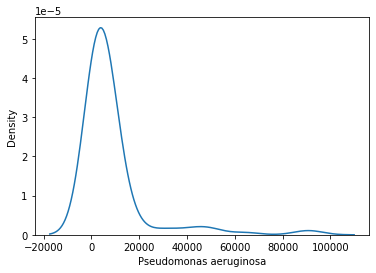

In [5]:
sns.kdeplot(data=df['Pseudomonas aeruginosa'])

In [6]:
genus = 'Pseudomonas aeruginosa'
list(df[df[genus] < 100][genus])
#df[df[genus] > 0].shape

[13, 31]

In [7]:
# Create some bins for the sizes
# Define the bins and labels
# Non zero mean is the mean of all the non zero values
genus = 'Pseudomonas aeruginosa'
mn = np.mean(df[df[genus] > 0][genus])
md = np.median(df[df[genus] > 0][genus])
print(f"The mean for {genus} is {mn} and the median is {md}", file=sys.stderr)

nonzeromean = np.median(df[df[genus] > 0][genus])
bins = [-1, 0, nonzeromean/2, nonzeromean*2, float('inf')]  # Include -1 to capture 0 in 'small'

#bins = [-1, 200, 5000, 10000, float('inf')]
labels = ['small', 'medium', 'large']
sizelist = [50, 200, 500, 1000]
marker_shapes = ['s', 'V', '^', 'o'] # see https://seaborn.pydata.org/tutorial/properties.html#marker

# Create a new column 'size' based on the conditions
sizes = list(pd.cut(df['Pseudomonas aeruginosa'], bins=bins, labels=sizelist))
markers = list(pd.cut(df['Pseudomonas aeruginosa'], bins=bins, labels=marker_shapes))

The mean for Pseudomonas aeruginosa is 8507.88524590164 and the median is 4485.0


In [8]:
# Normalization/Transformation
# Square root transform
sqrt_df = np.sqrt(df)

# perform the PCA
pca = PCA(n_components=2)

pca_result = pca.fit_transform(sqrt_df)
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, index=df.index, columns=['PC1', 'PC2'])

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# Create a DataFrame for loadings with feature names
# Select the top 5 most important loadings
loadings_df = pd.DataFrame(loadings, index=df.columns, columns=['PC1', 'PC2'])

# Create a DataFrame for top loadings
top_loadings_df = loadings_df.loc[loadings_df['PC1'].abs().sort_values(ascending=False).index]
top_loadings_df.head()


explained_variance = pca.explained_variance_ratio_ * 100
pc1_variance = explained_variance[0]
pc2_variance = explained_variance[1]

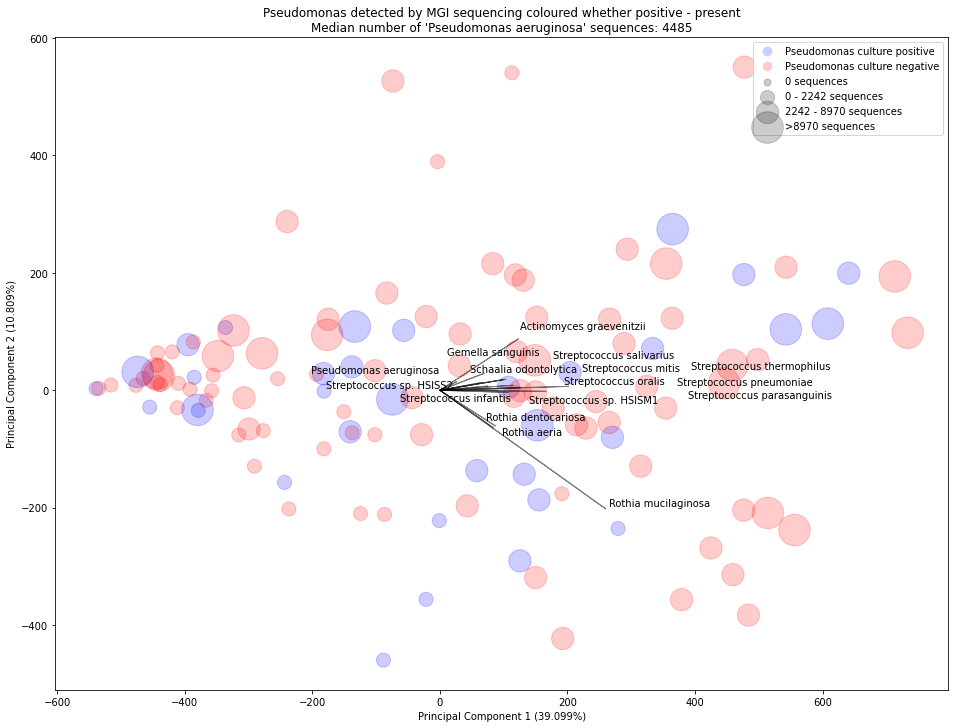

In [15]:
# Map colors based on the metadata column
colours = np.where(metadata['CS_Pseudomonas aeruginosa'] == 1, 'blue', 'red')

# Plot the PCA results
plt.figure(figsize=(16, 12))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.2, c=colours, s=sizes)
plt.title('Pseudomonas detected by MGI sequencing coloured whether positive - present' + f"\nMedian number of '{genus}' sequences: {md:.0f}")
plt.xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 15
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
for i in range(maxloadings):
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    plt.arrow(0, 0, xpos, ypos, 
              color='black', alpha=0.5, width=0.05)
    texts.append(plt.text(xpos, ypos, top_loadings_df.index[i], color='black'))

# specifically add Pseudomonas
pidx = top_loadings_df.index.get_loc('Pseudomonas aeruginosa')
xpos = top_loadings_df.iloc[pidx, 0]*plotscaler
ypos = top_loadings_df.iloc[pidx, 1]*plotscaler
plt.arrow(0, 0, xpos, ypos, color='black', alpha=0.5, width=0.05)
texts.append(plt.text(xpos, ypos, top_loadings_df.index[pidx], color='black'))

    
adjust_text(texts)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture positive', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture negative', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
small_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} sequences', 
                        alpha=0.2, s=sizelist[0])
med1_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} - {bins[2]:.0f} sequences', 
                        alpha=0.2, s=sizelist[1])
med2_patch = plt.scatter([], [], color='k', label=f'{bins[2]:.0f} - {bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[2])
big_patch = plt.scatter([], [], color='k', label=f'>{bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[3])

plt.legend(handles=[blue_patch, red_patch, small_patch, med1_patch, med2_patch, big_patch])


plt.savefig('img/MGI_species_pseudomonas_present.png')
# Show the plot
plt.show()

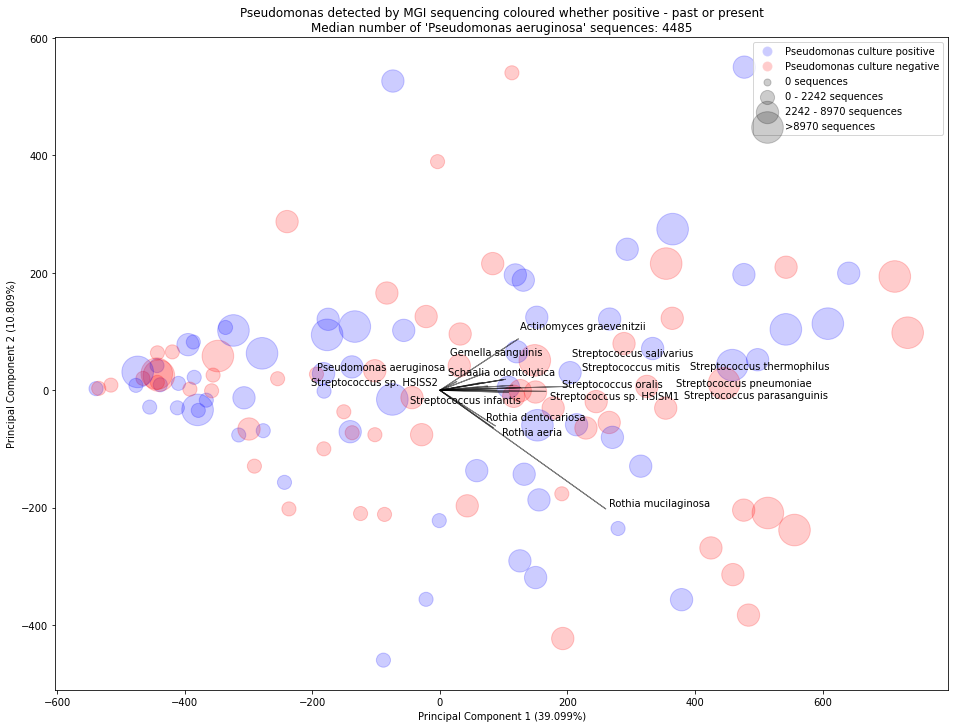

In [16]:
columns_to_check = ['CS_Pseudomonas aeruginosa', 'P12M_2_Pseudomonas aeruginosa']
colours = metadata[columns_to_check].isin([1]).any(axis=1).map({True: 'blue', False: 'red'})

# Plot the PCA results
plt.figure(figsize=(16, 12))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.2, c=colours, s=sizes)
plt.title('Pseudomonas detected by MGI sequencing coloured whether positive - past or present' + f"\nMedian number of '{genus}' sequences: {md:.0f}")
plt.xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 15
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
for i in range(maxloadings):
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    plt.arrow(0, 0, xpos, ypos, 
              color='black', alpha=0.5, width=0.05)
    texts.append(plt.text(xpos, ypos, top_loadings_df.index[i], color='black'))

# specifically add Pseudomonas
pidx = top_loadings_df.index.get_loc('Pseudomonas aeruginosa')
xpos = top_loadings_df.iloc[pidx, 0]*plotscaler
ypos = top_loadings_df.iloc[pidx, 1]*plotscaler
plt.arrow(0, 0, xpos, ypos, color='black', alpha=0.5, width=0.05)
texts.append(plt.text(xpos, ypos, top_loadings_df.index[pidx], color='black'))

    
adjust_text(texts)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture positive', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture negative', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
small_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} sequences', 
                        alpha=0.2, s=sizelist[0])
med1_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} - {bins[2]:.0f} sequences', 
                        alpha=0.2, s=sizelist[1])
med2_patch = plt.scatter([], [], color='k', label=f'{bins[2]:.0f} - {bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[2])
big_patch = plt.scatter([], [], color='k', label=f'>{bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[3])

plt.legend(handles=[blue_patch, red_patch, small_patch, med1_patch, med2_patch, big_patch])


plt.savefig('img/MGI_species_pseudomonas_past_present.png')
# Show the plot
plt.show()

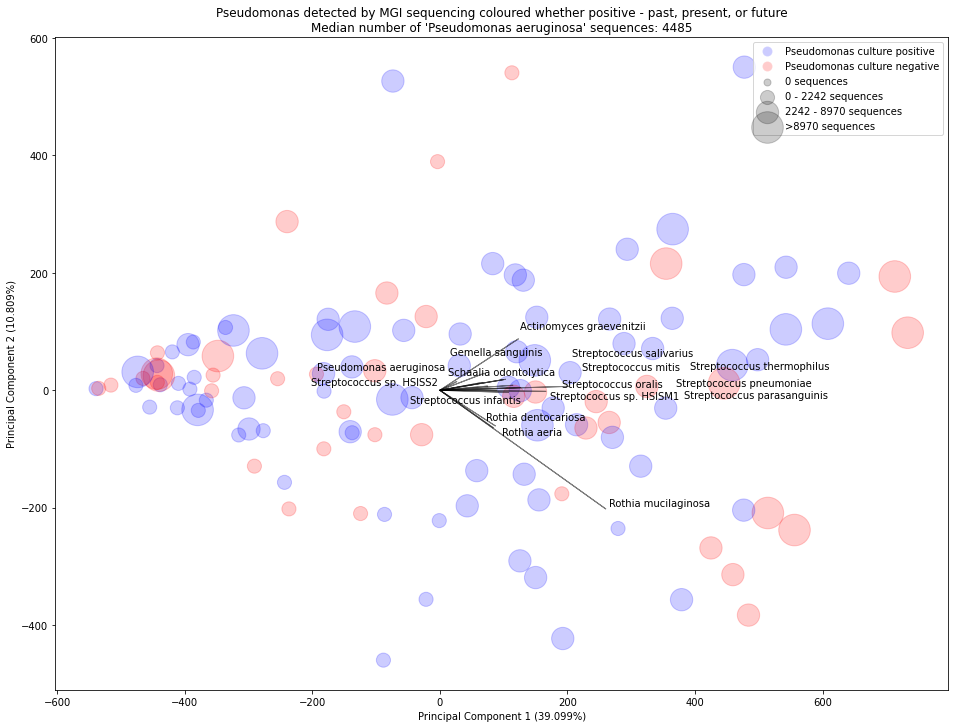

In [17]:
columns_to_check = ['CS_Pseudomonas aeruginosa', 'N12M_Pseudomonas aeruginosa', 'P12M_2_Pseudomonas aeruginosa']
colours = metadata[columns_to_check].isin([1]).any(axis=1).map({True: 'blue', False: 'red'})

# Plot the PCA results
plt.figure(figsize=(16, 12))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.2, c=colours, s=sizes)
plt.title('Pseudomonas detected by MGI sequencing coloured whether positive - past, present, or future' + f"\nMedian number of '{genus}' sequences: {md:.0f}")
plt.xlabel(f'Principal Component 1 ({pc1_variance:.3f}%)')
plt.ylabel(f'Principal Component 2 ({pc2_variance:.3f}%)')

# add the loadings ... we only plot maxloadings here
maxloadings = 15
if len(loadings) < maxloadings:
    maxloadings = len(loadings)

plotscaler = 2
texts = []
for i in range(maxloadings):
    xpos = top_loadings_df.iloc[i, 0]*plotscaler
    ypos = top_loadings_df.iloc[i, 1]*plotscaler
    plt.arrow(0, 0, xpos, ypos, 
              color='black', alpha=0.5, width=0.05)
    texts.append(plt.text(xpos, ypos, top_loadings_df.index[i], color='black'))

# specifically add Pseudomonas
pidx = top_loadings_df.index.get_loc('Pseudomonas aeruginosa')
xpos = top_loadings_df.iloc[pidx, 0]*plotscaler
ypos = top_loadings_df.iloc[pidx, 1]*plotscaler
plt.arrow(0, 0, xpos, ypos, color='black', alpha=0.5, width=0.05)
texts.append(plt.text(xpos, ypos, top_loadings_df.index[pidx], color='black'))

    
adjust_text(texts)

# Add a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture positive', 
                         markerfacecolor='blue', alpha=0.2, markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Pseudomonas culture negative', 
                        markerfacecolor='red', alpha=0.2, markersize=10)
small_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} sequences', 
                        alpha=0.2, s=sizelist[0])
med1_patch = plt.scatter([], [], color='k', label=f'{bins[1]:.0f} - {bins[2]:.0f} sequences', 
                        alpha=0.2, s=sizelist[1])
med2_patch = plt.scatter([], [], color='k', label=f'{bins[2]:.0f} - {bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[2])
big_patch = plt.scatter([], [], color='k', label=f'>{bins[3]:.0f} sequences', 
                        alpha=0.2, s=sizelist[3])

plt.legend(handles=[blue_patch, red_patch, small_patch, med1_patch, med2_patch, big_patch])

plt.savefig('img/MGI_species_pseudomonas_past_present_future.png')
# Show the plot
plt.show()